## Introdução

O objetivo deste notebook é fazer a extração/obtenção de três datasets de maneiras diferentes, o primeiro um arquivo de CSV dado pela Udacity, o segundo será feito o download do arquivo hospedado nos servidores da Udacity também, e por fim o último se trata de uma extração de dados diretamente do Twitter via API com auxílio da lib tweepy.

Inicialmente vamos importar as bibliotecas necessárias para o projeto:

In [2]:
# Importando libs que serão utilizadas no projeto
import pandas as pd
import requests
import json
import tweepy
import sys
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.precision', 50)
pd.options.display.max_colwidth = 100

## Importando os datasets

Agora é hora de iniciar a importação de cada um dos arquivos com os dados, primeiro vamos importar o arquivo fornecido pela Udacity:

In [3]:
# Lendo os datasets originais, primeiramente o dataset fornecido pela Udacity
weratedogs = pd.read_csv('twitter-archive-enhanced.csv')

# Testando o arquivo
weratedogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None


O segundo dataset é o que foi hospedado pela Udacity, vamos ler ele também:

In [4]:
# Fazendo download do dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url, allow_redirects=True)

open('image-predictions.tsv', 'wb').write(r.content)

# Lendo o arquivo, detalhe para a separação ser por tabs
imagepredictions = pd.read_csv('image-predictions.tsv', sep='\t')

# Testando o segundo dataset
imagepredictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.46507399999999998740918272233102470636367797851562,True,collie,0.15666499999999999870325950723781716078519821166992,True,Shetland_sheepdog,0.06142849999999999699440422773477621376514434814453,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.50682599999999999873523393034702166914939880371094,True,miniature_pinscher,0.07419169999999998543760426628068671561777591705322,True,Rhodesian_ridgeback,0.07201000000000000456079618516014306806027889251709,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.59646100000000001895017476272187195718288421630859,True,malinois,0.13858399999999998497557385235268156975507736206055,True,bloodhound,0.11619699999999999473487832801765762269496917724609,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.40814299999999997803357132397650275379419326782227,True,redbone,0.36068699999999997984900801384355872869491577148438,True,miniature_pinscher,0.22275200000000000555289147996518295258283615112305,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56031100000000000349587025993969291448593139648438,True,Rottweiler,0.24368200000000000970956648416176903992891311645508,True,Doberman,0.15462899999999998867927786250220378860831260681152,True


Um pequeno detalhe do primeiro para o segundo dataset, é que o primeiro é um .CSV separado por vírgulas, e o segundo é um .TSV que é separado por tabs.

Agora por fim, vamos importar os dados do terceiro dataset via API do twitter:

In [5]:
# Configurando tweepy
'''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


# ids dos tweets
ids = weratedogs['tweet_id']

# abrindo arquivo
file = open('tweet_json.txt','w') 


# iterando nos ids
for i in (ids):
    try:
        tweet = api.get_status(i)
        if(tweet):
            file.write(str(i) + '\t' + str(tweet.retweet_count) + '\t' + str(tweet.favorite_count) + '\t' + str(tweet.created_at) + '\n')
    except:
        e = sys.exc_info()[0]
        print( "<p>Error: %s</p>" % e )
        
# fechando o arquivo        
file.close()
'''

# criando dataset
tweet_json = pd.read_csv('tweet_json.txt', sep="\t", header=None)
tweet_json.columns = ["tweet_id", "retweet_count", "favorite_count", "created_at"]

# testando dataset criado a partir de dados do tweeter
tweet_json.head(20)

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,8476,38486,2017-08-01 16:23:56
1,892177421306343426,6238,32985,2017-08-01 00:17:27
2,891815181378084864,4134,24833,2017-07-31 00:18:03
3,891689557279858688,8601,41863,2017-07-30 15:58:51
4,891327558926688256,9331,40022,2017-07-29 16:00:24
5,891087950875897856,3094,20074,2017-07-29 00:08:17
6,890971913173991426,2056,11750,2017-07-28 16:27:12
7,890729181411237888,18798,64980,2017-07-28 00:22:40
8,890609185150312448,4243,27593,2017-07-27 16:25:51
9,890240255349198849,7368,31675,2017-07-26 15:59:51


Agora que temos nossos 3 arquivos com dados, vamos a análise de problemas.

## Avaliando os dados

Vamos avaliar os nossos conjuntos de dados!




In [6]:
# Método info nos datasets
weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
imagepredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 4 columns):
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
created_at        2342 non-null object
dtypes: int64(3), object(1)
memory usage: 73.3+ KB


In [9]:
# Verificando colunas com duplicidade
all_columns = pd.Series(list(weratedogs) + list(imagepredictions) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [10]:
weratedogs.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [11]:
# Método describe nos datasets
weratedogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356.0,78.0,78.00,181.0,181.0,2356.000000000000000000000000000000000000000000000000,2356.00000000000000000000000000000000000000000000000000
mean,742771590321719808.0,745507917855750656.0,20141706360873208.00,772039961038007040.0,12416983653017580.0,13.126485568760610789240672602318227291107177734375,10.45543293718166388828194612869992852210998535156250
std,68567047444761032.0,75824920044192880.0,125279666255236320.00,62369278105055600.0,95992535331517536.0,45.876647623330107705896807601675391197204589843750,6.74523722694255578602451350889168679714202880859375
min,666020888022790144.0,665814696700723200.0,11856342.00,666104133288665088.0,783214.0,0.000000000000000000000000000000000000000000000000,0.00000000000000000000000000000000000000000000000000
25%,678398938214475776.0,675741911993464832.0,308637448.75,718631497683582976.0,4196983835.0,10.000000000000000000000000000000000000000000000000,10.00000000000000000000000000000000000000000000000000
50%,719627934716235776.0,703870840226598912.0,4196983835.00,780465709297995776.0,4196983835.0,11.000000000000000000000000000000000000000000000000,10.00000000000000000000000000000000000000000000000000
75%,799337304954252288.0,825780371286566912.0,4196983835.00,820314633777061888.0,4196983835.0,12.000000000000000000000000000000000000000000000000,10.00000000000000000000000000000000000000000000000000
max,892420643555336192.0,886266357075128320.0,840547864354918400.00,887473957103951872.0,787461778435289088.0,1776.000000000000000000000000000000000000000000000000,170.00000000000000000000000000000000000000000000000000


In [12]:
imagepredictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075.0,2075.00000000000000000000000000000000000000000000000000,2075.00000000000000000000000000000000000000000000000000,2075.00000000000000000000000000000000000000000000000000,2075.00000000000000000000000000000000000000000000000000
mean,738451357852539008.0,1.20385542168674697371955062408233061432838439941406,0.59454826361445822779927539158961735665798187255859,0.13458860950039183701498757272929651662707328796387,0.06032416861810645236641192923343623988330364227295
std,67852033330235656.0,0.56187502798363009315352201156201772391796112060547,0.27117351686569007851446144741203170269727706909180,0.10066573936432347824432298466490465216338634490967,0.05090593131945617827449623860047722700983285903931
min,666020888022790144.0,1.00000000000000000000000000000000000000000000000000,0.04433340000000000197255545231200812850147485733032,0.00000001011299999999999930202205611178001287697725,0.00000000017401699999999998441190987632376388841160
25%,676483507139540992.0,1.00000000000000000000000000000000000000000000000000,0.36441200000000001368860580441833008080720901489258,0.05388624999999999665156735773052787408232688903809,0.01622240000000000140212286225960269803181290626526
50%,711998809858043904.0,1.00000000000000000000000000000000000000000000000000,0.58823000000000003062439191126031801104545593261719,0.11818099999999999438760056591490865685045719146729,0.04944380000000000302540215102453657891601324081421
75%,793203448525178880.0,1.00000000000000000000000000000000000000000000000000,0.84385500000000002174260771425906568765640258789062,0.19556550000000000322231130667205434292554855346680,0.09180755000000000165538693863709340803325176239014
max,892420643555336192.0,4.00000000000000000000000000000000000000000000000000,1.00000000000000000000000000000000000000000000000000,0.48801400000000011436540603426692541688680648803711,0.27341900000000002313171876267006155103445053100586


In [13]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2342.0,2342.0000000000000000000000000000000000000000,2342.000000000000000000000000000000000000000
mean,742264601089249536.0,2980.2843723313408190733753144741058349609375,8041.522203245089258416555821895599365234375
std,68374656561591296.0,4990.5761818138689704937860369682312011718750,12366.505251144686553743667900562286376953125
min,666020888022790144.0,0.0000000000000000000000000000000000000000,0.000000000000000000000000000000000000000
25%,678350865747605504.0,599.2500000000000000000000000000000000000000,1393.000000000000000000000000000000000000000
50%,718622401733490688.0,1395.0000000000000000000000000000000000000000,3508.000000000000000000000000000000000000000
75%,798700973901418496.0,3477.7500000000000000000000000000000000000000,9878.500000000000000000000000000000000000000
max,892420643555336192.0,84230.0000000000000000000000000000000000000000,162513.000000000000000000000000000000000000000


## Detectando os problemas

### Problemas de qualidade

#### weratedogs df

- Alguns twitters foram deletados, o que vai causar inconsistência com os dados presentes no dataset da Udacity e dos extraidos via API &#10004;
- Alguns cachorros tem mais que um status &#10004;
- *rating_numerator* com números menores que 10 (todos verificados no Twitter eram 10) &#10004;
- *rating_numerator* com números maiores que 20 (todos verificados no Twitter eram entre 10~16) &#10004;
- *rating_denominator* com números menores que 10 (todos verificados no Twitter eram 10+) &#10004;
- *rating_denominator* com números maiores que 10 (todos verificados no Twitter eram 10+) &#10004;
- *name* com nomes como None, a, an, the &#10004;
- *expanded_urls* com links diferentes do twitter (https://www.gofundme.com/mingusneedsus) &#10004;
- *timestamp* com um +0000 desnecessário no fim &#10004;
- O dataset apresenta alguns retweets, verificar *retweeted_status_id* &#10004;
- *timestamp* está como string &#10004;

### Problemas de arrumação

- A coluna de *retweet_count* de **twitter_json** deve estar e **weratedogs** &#10004;
- A coluna de *favorite_count* de **twitter_json** deve estar em **weratedogs** &#10004;
- *tweet_id* de **imagepredictions** está ao contrário dos demais datasets &#10004;
- os status de cachorro de **weratedogs** poderiam estar em uma coluna &#10004;

## Criando os arquivos limpos

In [14]:
weratedogs_clean = weratedogs.copy()
imagepredictions_clean = imagepredictions.copy()
tweet_json_clean = tweet_json.copy()

## Dados faltantes

### 1- Alguns twitters foram deletados, o que vai causar inconsistência com os dados presentes no dataset da Udacity e dos extraidos via API

Um pequeno problema: alguns twitters foram deletados, assim sendo o dataset da API tem algumas linhas a menos, precisamos deixa-los iguais para não afetar a nossa limpeza e futura análise

#### O que será feito:

Vamos comparar os ids de twitter, os que não existirem no *weratedogs*, serão deletados.

### Código

In [15]:
# Achando os ids que são diferentes
difference = pd.concat([weratedogs_clean['tweet_id'],tweet_json_clean['tweet_id']]).drop_duplicates(keep=False)

# Removendo os ids diferentes
weratedogs_clean = weratedogs_clean[~weratedogs_clean['tweet_id'].isin(difference)]

weratedogs_clean = weratedogs_clean.reset_index(drop=True)

### Teste

In [16]:
len(weratedogs_clean)

2342

In [17]:
len(tweet_json_clean)

2342

## Problemas de arrumação

Primeiramente vamos solucionar os problemas de organização definidos anteriormente

### 1 - A coluna de retweet_count de twitter_json deve estar em weratedogs:

#### O que será feito:

A coluna retweet_count será transferida do dataset **twitter_json** para o **weratedogs**, vamos nos guiar pela numeração dos ids.

### Código:

In [18]:
weratedogs_clean = pd.concat([weratedogs_clean, tweet_json_clean['retweet_count']], axis=1)

### Teste:

In [19]:
weratedogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8476
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6238
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4134
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8601
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None,9331


### 2 - A coluna de favorite_count de twitter_json deve estar em weratedogs:

#### O que será feito:

A coluna favorite_count será transferida do dataset **twitter_json** para o **weratedogs**, vamos nos guiar pela numeração dos ids.

### Código:

In [20]:
weratedogs_clean = pd.concat([weratedogs_clean, tweet_json_clean['favorite_count']], axis=1)

### Teste

In [21]:
weratedogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8476,38486
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6238,32985
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4134,24833
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8601,41863
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None,9331,40022


### 3 - tweet_id de imagepredictions está ao contrário dos demais datasets:

#### O que será feito:

Vamos inverter a ordem de tweet_id do dataset **imagepredictions**

### Código:

In [22]:
imagepredictions_clean = imagepredictions.sort_values('tweet_id', ascending = False)

### Teste:

In [23]:
imagepredictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.09704859999999999875530676263224449940025806427002,False,bagel,0.08585110000000001351239120594982523471117019653320,False,banana,0.07610999999999999710009745967909111641347408294678,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32358100000000000751043671698425896465778350830078,True,Pekinese,0.09064650000000000484856599314298364333808422088623,True,papillon,0.06895690000000000152713397483239532448351383209229,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.71601199999999998180300053718383423984050750732422,True,malamute,0.07825300000000000311128900420953868888318538665771,True,kelpie,0.03137890000000000123581145317075424827635288238525,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17027799999999998492583586084947455674409866333008,False,Labrador_retriever,0.16808600000000001317701503467105794697999954223633,True,spatula,0.04083590000000000136415323481742234434932470321655,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.55571199999999998375699306052410975098609924316406,True,English_springer,0.22576999999999999846345133391878334805369377136230,True,German_short-haired_pointer,0.17521900000000001362820967187872156500816345214844,True


In [24]:
weratedogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8476,38486
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6238,32985
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4134,24833
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8601,41863
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None,9331,40022


In [25]:
weratedogs_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8476,38486
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6238,32985
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4134,24833
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8601,41863
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None,9331,40022
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,3094,20074
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991...",13,10,Jax,None,None,None,None,2056,11750
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/st...",13,10,None,None,None,None,None,18798,64980
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None,4243,27593
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None,

### 4 - os status de cachorro de weratedogs poderiam estar em uma coluna

#### O que será feito:

Vamos criar uma coluna chamada dog_status no dataset **wearedogs** e adicionar os status corretos a cada uma

Porem antes de resolver este problema, devemos lidar com um problema de qualidade antes, que é: cachorros com mais de um status, vamos deletar estas linhas pois não sabemos realmente quais são os status corretos

### Código:

In [26]:
# Resolvendo primeiro o problema de qualidade, vamos identificar os cachorros com mais de um status
double_status_rows = weratedogs_clean.loc[
                        ((weratedogs_clean['doggo'] == 'doggo') &  (weratedogs_clean['floofer'] == 'floofer')) |
                        ((weratedogs_clean['doggo'] == 'doggo') &  (weratedogs_clean['pupper'] == 'pupper')) |
                        ((weratedogs_clean['doggo'] == 'doggo') &  (weratedogs_clean['puppo'] == 'puppo')) |
                        ((weratedogs_clean['floofer'] == 'floofer') &  (weratedogs_clean['pupper'] == 'pupper')) |
                        ((weratedogs_clean['floofer'] == 'floofer') &  (weratedogs_clean['puppo'] == 'puppo')) |
                        ((weratedogs_clean['puppo'] == 'puppo') &  (weratedogs_clean['pupper'] == 'pupper'))
                     ]

# Removendo as linhas com status duplo
weratedogs_clean.drop(double_status_rows.index, inplace=True)

In [27]:
# Criando a coluna
weratedogs_clean['dog_status'] = 'None'

# Buscando os ids dos status para preencher a coluna dog_status corretamente

weratedogs_clean.loc[weratedogs_clean['doggo'] == 'doggo', 'dog_status'] = 'doggo'
weratedogs_clean.loc[weratedogs_clean['floofer'] == 'floofer', 'dog_status'] = 'floofer'
weratedogs_clean.loc[weratedogs_clean['pupper'] == 'pupper', 'dog_status'] = 'pupper'
weratedogs_clean.loc[weratedogs_clean['puppo'] == 'puppo', 'dog_status'] = 'puppo'

## Teste:

In [28]:
len(weratedogs_clean.loc[weratedogs_clean['doggo'] == 'doggo'])

82

In [29]:
len(weratedogs_clean.loc[weratedogs_clean['dog_status'] == 'doggo'])

82

In [30]:
len(weratedogs_clean.loc[weratedogs_clean['floofer'] == 'floofer'])

9

In [31]:
len(weratedogs_clean.loc[weratedogs_clean['dog_status'] == 'floofer'])

9

In [32]:
len(weratedogs_clean.loc[weratedogs_clean['pupper'] == 'pupper'])

243

In [33]:
len(weratedogs_clean.loc[weratedogs_clean['dog_status'] == 'pupper'])

243

In [34]:
len(weratedogs_clean.loc[weratedogs_clean['puppo'] == 'puppo'])

29

In [35]:
len(weratedogs_clean.loc[weratedogs_clean['dog_status'] == 'puppo'])

29

### Dropando as colunas descenessárias:

In [36]:
# Dropando as colunas agora desnecessarias
weratedogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

## Problemas de qualidade

Agora que os dados estão organizados, vamos colocar ajustar os problemas de qualidade

### 1 - rating_numerator com números menores que 10 (todos verificados no Twitter eram 10):

#### O que será feito:

Como não temos e não sabemos as notas corretas, vamos remover as notas abaixo de 10

### Código:

In [37]:
# Encontrando ratings menores que 10
rating_less_than_10 = weratedogs_clean.loc[ weratedogs_clean['rating_numerator'] < 10]

# Removendo os dados errados encontrados
weratedogs_clean.drop(rating_less_than_10.index, inplace=True)

### Teste:

In [38]:
len(weratedogs_clean.loc[ weratedogs_clean['rating_numerator'] < 10])

0

### 2 - rating_numerator com números maiores que 20 (todos verificados no Twitter eram entre 10~16):

#### O que será feito:

Como não temos e não sabemos as notas corretas, vamos remover as notas abaixo de 10

### Código:

In [39]:
# Encontrando ratings menores que 10
rating_more_than_20 = weratedogs_clean.loc[ weratedogs_clean['rating_numerator'] > 20]

# Removendo os dados errados encontrados
weratedogs_clean.drop(rating_more_than_20.index, inplace=True)

### Teste:

In [40]:
len(weratedogs_clean.loc[ weratedogs_clean['rating_numerator'] > 20])

0

### 3 - rating_denominator com números menores que 10 (todos verificados no Twitter eram 10+)

#### O que será feito:

Vamos transformar todos os denominators menores que 10, para 10.

### Código:

In [41]:
# Substituindo os rating numerators menores que 10
weratedogs_clean.loc[ weratedogs_clean['rating_denominator'] < 10] = 10

### Teste:

In [42]:
len(weratedogs_clean.loc[ weratedogs_clean['rating_denominator'] < 10])

0

### 4 - rating_denominator com números maiores que 10 (todos verificados no Twitter eram 10+)

#### O que será feito:

Vamos transformar todos os denominators maiores que 10, para 10.

### Código:

In [43]:
# Substituindo os rating numerators maiores que 10
weratedogs_clean.loc[ weratedogs_clean['rating_denominator'] > 10] = 10

### Teste:

In [44]:
len(weratedogs_clean.loc[ weratedogs_clean['rating_denominator'] > 10])

0

### 5 - name com nomes como None, a, an, the

#### O que será feito:

Faremos o processo em duas etapas:
- Remover todos os nomes que são None (pois não sabemos o real nome deles)
- E também remover todos os nomes que não começam com uma letra maiúscula e tem 3 letras ou menos, para resolver o problema desses nomes estranhos

### Código:

In [45]:
# Encontrando nomes None
none_names = weratedogs_clean.loc[ weratedogs_clean['name'] == 'None']

# Removendo os dados errados encontrados
weratedogs_clean.drop(none_names.index, inplace=True)

# Definindo uma variável com os nomes
names = weratedogs_clean.loc[weratedogs_clean['name'].str.len() > 0]

# Criando array para inserir os ids das strings que não são nome
not_a_name = []

# Buscando nos nomes o que não é nome
for index, row in names.iterrows():
    if(row['name'].islower()):
        not_a_name.append(row['tweet_id'])

# Deletando o que não é nome        
weratedogs_clean = weratedogs_clean[~weratedogs_clean['tweet_id'].isin(not_a_name)]

weratedogs_clean = weratedogs_clean.reset_index(drop=True)

## Teste:

In [46]:
(weratedogs_clean['name'] == 'a').sum()

0

In [47]:
(weratedogs_clean['name'] == 'the').sum()

0

In [48]:
(weratedogs_clean['name'] == 'Ted').sum()

3

In [49]:
(weratedogs_clean['name'].str.islower()).sum()

0

In [50]:
weratedogs_clean['name']

0         Phineas
1           Tilly
2          Archie
3           Darla
4        Franklin
5             Jax
6            Zoey
7          Cassie
8            Koda
9           Bruno
10            Ted
11         Stuart
12         Oliver
13            Jim
14           Zeke
15        Ralphus
16         Gerald
17        Jeffrey
18         Canela
19           Maya
20         Mingus
21          Derek
22         Roscoe
23        Waffles
24          Jimbo
25         Maisey
26          Lilly
27           Earl
28           Lola
29          Kevin
          ...    
1199       Gòrdón
1200         DayZ
1201        Rusty
1202       Sophie
1203       Jareld
1204       Torque
1205     Skittles
1206         Otis
1207         Erik
1208          Stu
1209       Shaggy
1210        Filup
1211        Olive
1212         Kial
1213    Naphaniel
1214         Hall
1215      Cupcake
1216       Joshwa
1217      Timison
1218      Kenneth
1219      Churlie
1220      Bradlay
1221        Pipsy
1222         Gabe
1223      

### Teste:

In [51]:
weratedogs_clean['name']

0         Phineas
1           Tilly
2          Archie
3           Darla
4        Franklin
5             Jax
6            Zoey
7          Cassie
8            Koda
9           Bruno
10            Ted
11         Stuart
12         Oliver
13            Jim
14           Zeke
15        Ralphus
16         Gerald
17        Jeffrey
18         Canela
19           Maya
20         Mingus
21          Derek
22         Roscoe
23        Waffles
24          Jimbo
25         Maisey
26          Lilly
27           Earl
28           Lola
29          Kevin
          ...    
1199       Gòrdón
1200         DayZ
1201        Rusty
1202       Sophie
1203       Jareld
1204       Torque
1205     Skittles
1206         Otis
1207         Erik
1208          Stu
1209       Shaggy
1210        Filup
1211        Olive
1212         Kial
1213    Naphaniel
1214         Hall
1215      Cupcake
1216       Joshwa
1217      Timison
1218      Kenneth
1219      Churlie
1220      Bradlay
1221        Pipsy
1222         Gabe
1223      

### 6 - *expanded_urls* com links diferentes do twitter (ex: https://www.gofundme.com/mingusneedsus)

#### O que será feito:

Primeiramente vamos padronizar a URL base para 'https://twitter.com/dog_rates/status/', depois vamos concatenar o tweet_id ao final desta string

### Código:

In [52]:
# Definindo a URL base
weratedogs_clean['expanded_urls'] = 'https://twitter.com/dog_rates/status/'

# Adicionando o tweet_id ao final da string
weratedogs_clean['expanded_urls'] = weratedogs_clean['expanded_urls'].astype(str) + weratedogs_clean['tweet_id'].astype(str)

### Teste:

In [53]:
weratedogs_clean['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643555336193
1       https://twitter.com/dog_rates/status/892177421306343426
2       https://twitter.com/dog_rates/status/891815181378084864
3       https://twitter.com/dog_rates/status/891689557279858688
4       https://twitter.com/dog_rates/status/891327558926688256
5       https://twitter.com/dog_rates/status/890971913173991426
6       https://twitter.com/dog_rates/status/890609185150312448
7       https://twitter.com/dog_rates/status/890240255349198849
8       https://twitter.com/dog_rates/status/890006608113172480
9       https://twitter.com/dog_rates/status/889880896479866881
10      https://twitter.com/dog_rates/status/889638837579907072
11      https://twitter.com/dog_rates/status/889531135344209921
12      https://twitter.com/dog_rates/status/889278841981685760
13      https://twitter.com/dog_rates/status/888917238123831296
14      https://twitter.com/dog_rates/status/888804989199671297
15      https://twitter.com/dog_rates/st

### 7 - *timestamp* com um +0000 desnecessário no fim

#### O que será feito:

Usando o slice vamos remover o +0000 da coluna

### Código:


In [54]:
weratedogs_clean['timestamp'] = weratedogs_clean['timestamp'].str.slice(0,-6)

### Teste:

In [55]:
weratedogs_clean['timestamp']

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
5       2017-07-28 16:27:12
6       2017-07-27 16:25:51
7       2017-07-26 15:59:51
8       2017-07-26 00:31:25
9       2017-07-25 16:11:53
10      2017-07-25 00:10:02
11      2017-07-24 17:02:04
12      2017-07-24 00:19:32
13      2017-07-23 00:22:39
14      2017-07-22 16:56:37
15      2017-07-22 00:23:06
16      2017-07-20 16:49:33
17      2017-07-19 16:06:48
18      2017-07-19 00:47:34
19      2017-07-17 16:17:36
20      2017-07-16 23:58:41
21      2017-07-16 20:14:00
22      2017-07-15 23:25:31
23      2017-07-15 16:17:19
24      2017-07-14 22:10:11
25      2017-07-13 15:58:47
26      2017-07-13 01:35:06
27      2017-07-12 00:01:00
28      2017-07-11 20:47:12
29      2017-07-11 00:00:02
               ...         
1199    2015-11-22 20:37:34
1200    2015-11-22 17:23:57
1201    2015-11-22 04:33:59
1202    2015-11-22 03:46:11
1203    2015-11-22 0

### 8 - O dataset apresenta alguns retweets, verificar *retweeted_status_id*

#### O que será feito:

Conforme solicitado pela motivação do projeto, vamos remover os retweets.

### Código:

In [56]:
# Encontrando os retweets
retweets = weratedogs_clean.loc[weratedogs_clean['retweeted_status_id'].notnull()]

# Dropando os retweets
weratedogs_clean.drop(retweets.index, inplace=True)

### Teste:

In [57]:
len(weratedogs_clean.loc[weratedogs_clean['retweeted_status_id'].notnull()])

0

### 9 - *timestamp* está como string

#### O que será feito:

Vamos transformar o tipo da coluna para timestamp

### Código:

In [58]:
# Convertendo para datetime
weratedogs_clean['timestamp'] =  pd.to_datetime(weratedogs_clean['timestamp'])

### Teste:

In [59]:
# Verificando o tipo
weratedogs_clean['timestamp'].dtype

dtype('<M8[ns]')

In [60]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

## Análise:

Agora com os dados limpos, vamos explorar o conjunto de dados. 

Nossos objetivos são:

#### Análise sobre a evolução do perfil WeRateDogs ao longo dos anos:
1. A quantidade de tweets aumentou com o tempo?
2. A quantidade de likes e retweets aumentou com o tempo?
3. A nota máxima aumentou ao longo dos anos?

#### Análise entre relação de likes e retweet counts:
4. Há relação entre a quantidade likes e retweets dos tweets?

#### Análise sobre os status dos cachorros:
5. Quais as proporções dos status neste conjunto?
6. O status influencia na nota do cachorro?
7. O status influencia na quantidade de likes e retweets?

Agora que já temos nosso objetivo do projeto, vamos salvar o dataset como principal:

In [61]:
# Salvando CSV
weratedogs_clean.to_csv('twitter_archive_master.csv.csv', sep=',', index=False)

# Lendo o nosso novo CSV
df = pd.read_csv('twitter_archive_master.csv.csv')

# Testando
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193,13,10,Phineas,8476,38486,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426,13,10,Tilly,6238,32985,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,4134,24833,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,8601,41863,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,9331,40022,None


## 1. A quantidade de tweets por ano aumentou?

Como temos poucos dados do primeiro e do último ano, vamos distribuir trimestralmente o tempo, assim a análise ficará mais real, pois mostrará o avanço em menores espaços de tempo, vamos lá!

#### Código

In [62]:
# Separando por anos
# 2015
df2015_1 = df.loc[df['timestamp'] < '2015-03-01']
df2015_2 = df.loc[(df['timestamp'] < '2015-06-01') & (df['timestamp'] >'2015-03-01')]
df2015_3 = df.loc[(df['timestamp'] < '2015-09-01') & (df['timestamp'] >'2015-06-01')]
df2015_4 = df.loc[(df['timestamp'] < '2015-12-01') & (df['timestamp'] >'2015-09-01')]

# 2016
df2016_1 = df.loc[(df['timestamp'] < '2016-03-01') & (df['timestamp'] >'2016-01-01')]
df2016_2 = df.loc[(df['timestamp'] < '2016-06-01') & (df['timestamp'] >'2016-03-01')]
df2016_3 = df.loc[(df['timestamp'] < '2016-09-01') & (df['timestamp'] >'2016-06-01')]
df2016_4 = df.loc[(df['timestamp'] < '2016-12-01') & (df['timestamp'] >'2016-09-01')]

# 2017
df2017_1 = df.loc[(df['timestamp'] < '2017-03-01') & (df['timestamp'] >'2017-01-01')]
df2017_2 = df.loc[(df['timestamp'] < '2017-06-01') & (df['timestamp'] >'2017-03-01')]
df2017_3 = df.loc[(df['timestamp'] < '2017-09-01') & (df['timestamp'] >'2017-06-01')]
df2017_4 = df.loc[(df['timestamp'] < '2017-12-01') & (df['timestamp'] >'2017-09-01')]

#### Visualização:

Vamos formar o gráfico, como temos dados a partir do último trimestre de 2015 vamos iniciar por eles, e finalizar no segundo de 2017 pois o terceiro já acabam os dados em agosto:

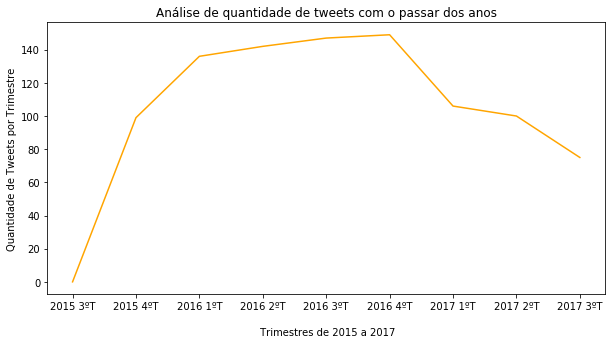

In [63]:
# Datas para legenda
dates = ['2015 3ºT','2015 4ºT','2016 1ºT','2016 2ºT','2016 3ºT','2016 4ºT', '2017 1ºT','2017 2ºT','2017 3ºT']

# Quantidade de tweets
tweets_qtd = [len(df2015_3), len(df2015_4), len(df2016_1), len(df2016_2), len(df2016_3), len(df2016_4), len(df2017_1), len(df2017_2), len(df2017_3)]

# Formando o gráfico
plt.figure(figsize=(10,5))
plt.plot(dates, tweets_qtd, color='orange')

# Labels e titulo de gráfico
plt.xlabel('\n Trimestres de 2015 a 2017')
plt.ylabel('Quantidade de Tweets por Trimestre')
plt.title('Análise de quantidade de tweets com o passar dos anos')
plt.show()

#### Insight:

É possível notar que temos um aumento de tweets até o ultimo trimestre de 2016, depois disso eles começam a decair um pouco.

## 2. A quantidade de likes e retweets aumentaram com o tempo?

Vamos aproveitar as variáveis que reuniram informações sobre os trimestres para verificar os likes e retweets

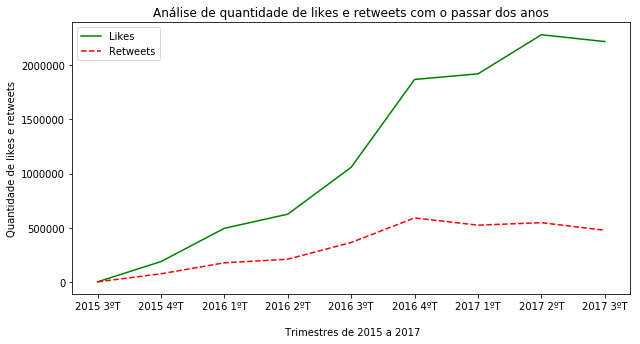

In [64]:
# Quantidade de likes
likes_qtd = [df2015_3['favorite_count'].sum(), df2015_4['favorite_count'].sum(), df2016_1['favorite_count'].sum(), df2016_2['favorite_count'].sum(), df2016_3['favorite_count'].sum(), df2016_4['favorite_count'].sum(), df2017_1['favorite_count'].sum(), df2017_2['favorite_count'].sum(), df2017_3['favorite_count'].sum()]
# Quantidade de Retweets
retweets_qtd = [df2015_3['retweet_count'].sum(), df2015_4['retweet_count'].sum(), df2016_1['retweet_count'].sum(), df2016_2['retweet_count'].sum(), df2016_3['retweet_count'].sum(), df2016_4['retweet_count'].sum(), df2017_1['retweet_count'].sum(), df2017_2['retweet_count'].sum(), df2017_3['retweet_count'].sum()]

plt.figure(figsize=(10,5))

# Formando o gráfico
plt.figure(figsize=(10,5))
plt.plot(likes_qtd, 'g-', retweets_qtd, 'r--')

# Legenda
plt.legend(['Likes', 'Retweets'])

# Labels e titulo de gráfico
plt.xticks(np.arange(9), ('2015 3ºT','2015 4ºT','2016 1ºT','2016 2ºT','2016 3ºT','2016 4ºT', '2017 1ºT','2017 2ºT','2017 3ºT'))
plt.xlabel('\n Trimestres de 2015 a 2017')
plt.ylabel('Quantidade de likes e retweets')
plt.title('Análise de quantidade de likes e retweets com o passar dos anos')
plt.show()

#### Insight:

Mesmo que no fim do gráfico apresente uma leve queda, a diminuiçao de quantidade de twitters não afetou o número de likes e retweets, eles permeceram crescentes.

## 3. A nota máxima aumentou ao longo dos anos?

Vamos verificar agora se o autor de WeRateDogs foi subindo a nota máxima que os cachorros poderiam ganhar durante os anos.

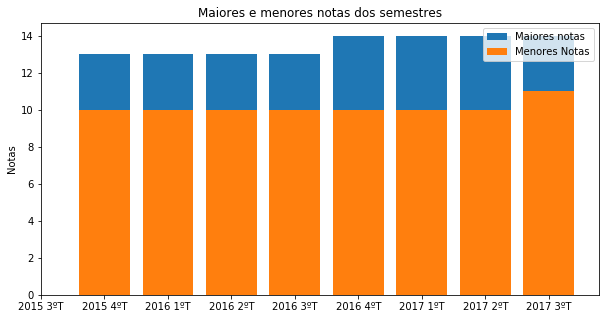

In [65]:
# Maiores notas
maiores_notas = [df2015_3['rating_numerator'].max(), df2015_4['rating_numerator'].max(), df2016_1['rating_numerator'].max(), df2016_2['rating_numerator'].max(), df2016_3['rating_numerator'].max(), df2016_4['rating_numerator'].max(), df2017_1['rating_numerator'].max(), df2017_2['rating_numerator'].max(), df2017_3['rating_numerator'].max()]
# Menores notas
menores_notas = [df2015_3['rating_numerator'].min(), df2015_4['rating_numerator'].min(), df2016_1['rating_numerator'].min(), df2016_2['rating_numerator'].min(), df2016_3['rating_numerator'].min(), df2016_4['rating_numerator'].min(), df2017_1['rating_numerator'].min(), df2017_2['rating_numerator'].min(), df2017_3['rating_numerator'].min()]

plt.figure(figsize=(10,5))

p1 = plt.bar(np.arange(9),maiores_notas)
p2 = plt.bar(np.arange(9),menores_notas)

plt.ylabel('Notas')
plt.title('Maiores e menores notas dos semestres')
plt.xticks(np.arange(9), ('2015 3ºT','2015 4ºT','2016 1ºT','2016 2ºT','2016 3ºT','2016 4ºT', '2017 1ºT','2017 2ºT','2017 3ºT'))
plt.legend((p1[0], p2[0]), ('Maiores notas', 'Menores Notas'))

plt.show()

#### Insight:

O passar do tempo não contribuiu muito para aumentar as notas, mas podemos perceber que depois do terceiro semestre de 2016 há aparição da nota 14, e uma curiosidade é que no terceiro trimestre de 2017 a menor nota é 11.

## 4. Há relação entre a quantidade likes e retweets dos tweets?

Vamos verificar se quanto maior o número de likes de um tweet, mais temos retweets.

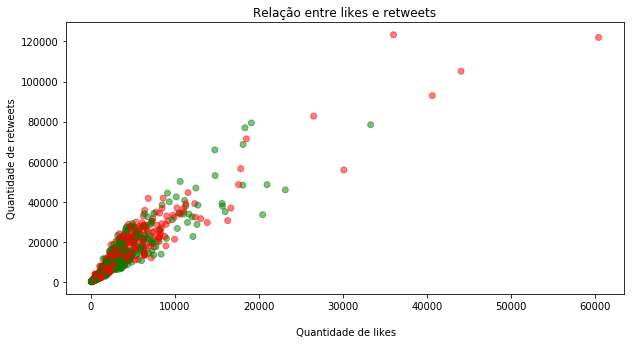

In [66]:
# Coletando likes e retweets
favorite_count = df['favorite_count']
retweet_count = df['retweet_count']

# Criando gráfico

plt.figure(figsize=(10,5))
plt.scatter(retweet_count, favorite_count, alpha=0.5, color=['g','r'])

plt.title('Scatter plot pythonspot.com')
plt.xlabel('\n Quantidade de likes')
plt.ylabel('Quantidade de retweets')
plt.title('Relação entre likes e retweets')
plt.show()

#### Insight:

É possível perceber que há uma correlação positiva, apesar dos outliers que prejudicam um pouco a avaliação.

## 5. Quais as proporções dos status neste conjunto?

Vamos descobrir qual a quantidade de cachorros para cada status.

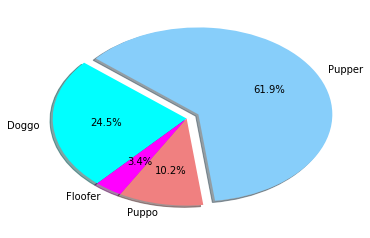

In [67]:
# Localizando os cachorros para cada status
doggo = df.loc[df['dog_status'] == 'doggo']
floofer = df.loc[df['dog_status'] == 'floofer']
puppo = df.loc[df['dog_status'] == 'puppo']
pupper = df.loc[df['dog_status'] == 'pupper']

# Criando o gráfico
labels = 'Doggo', 'Floofer', 'Puppo', 'Pupper'
sizes = [len(doggo), len(floofer), len(puppo), len(pupper)]
colors = ['cyan', 'magenta', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

#### Insight:

Pupper o status mais populado com 61.9%, Doggo em seguida com 24.5%, Puppo com 10.2% e Floofer com 3.4%

## 6. O status influencia na nota do cachorro?

Vamos verificar a média da nota por cada status.

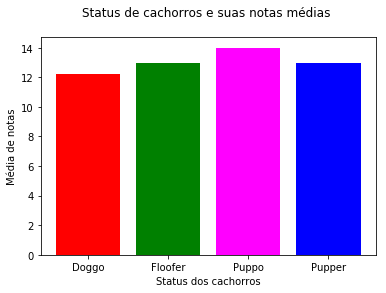

In [68]:
# Vamos aproveitar as variáveis definidas anteriormente e pegar a maior nota
doggo_grade = doggo['rating_numerator'].mean()
floofer_grade = floofer['rating_numerator'].max()
puppo_grade = puppo['rating_numerator'].max()
pupper_grade = pupper['rating_numerator'].max()

# Construção do gráfico
dog_status = ('Doggo', 'Floofer', 'Puppo', 'Pupper')
grades = [doggo_grade,floofer_grade,puppo_grade,pupper_grade]
 
plt.bar(dog_status, grades, align='center', color=['r','g','b','magenta'])
plt.xticks(dog_status)
plt.ylabel('Média de notas')
plt.xlabel('Status dos cachorros')
plt.title('Status de cachorros e suas notas médias \n')
 
plt.show()

#### Insight:

Pelo gráfico apresentado podemos ver que não há nenhuma nota muito favorecida por causa dos status, mas conseguimos observar que Doggo tem a pior nota 12, Floofer e Pupper tem notas iguais de 12,5 e Puppo lidera com quase 14

## 7. O status influencia na quantidade de likes e retweets?

Vamos calcular a média de retweets e likes por status de cachorro e ver se o status contribui para este número.

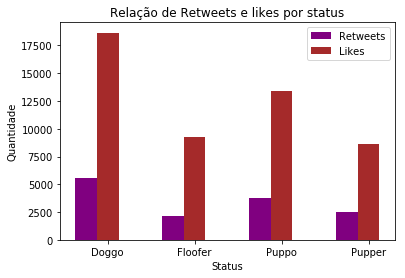

In [69]:
# Obtendo a média de retweets e likes por status de cachorro
doggo_retweet = doggo['retweet_count'].mean()
doggo_favorite = doggo['favorite_count'].mean()
floofer_retweet = floofer['retweet_count'].mean()
floofer_favorite = floofer['favorite_count'].mean()
puppo_retweet = puppo['retweet_count'].mean()
puppo_favorite = puppo['favorite_count'].mean()
pupper_retweet = pupper['retweet_count'].mean()
pupper_favorite = pupper['favorite_count'].mean()

# Construção do gráfico
barWidth = 0.25

retweets = [doggo_retweet, floofer_retweet, puppo_retweet, pupper_retweet]
favorite = [doggo_favorite, floofer_favorite, puppo_favorite, pupper_favorite]

# Set position of bar on X axis
r1 = np.arange(len(retweets))
r2 = [x + barWidth for x in r1]

plt.bar(r1, retweets, width=barWidth, color='purple', label='Retweets')
plt.bar(r2, favorite, width=barWidth, color='brown', label='Likes')
 
# Adicionado legendas
plt.xticks([r + barWidth for r in range(len(retweets))], ['Doggo', 'Floofer', 'Puppo', 'Pupper'])
plt.xlabel('Status')
plt.ylabel('Quantidade')

plt.title('Relação de Retweets e likes por status')
 
# Criar a legenda e mostrar o gráfico
plt.legend()
plt.show()

#### Insight:

A grande diferença de likes aqui vai para o status Doggo que possui mais de 17500 likes em média, quase 4000 a mais que Puppo que tem aproximadamente 14000 na segunda posição.

Em retweets a liderança também se mantem com Doggo com mais de 5000, enquanto o segundo colocado Puppo está com aproximadamente 4000.

## Conclusão:

Com as nossas análises foi possível observar, de acordo com a primeira dúvida, que os tweets realmente aumentaram muito com o passar do tempo de 2015 para 2016, porem em 2017 este número começou a cair. 

Da mesma forma os tweets e likes aumentaram exponencialmente com o crescimento deste perfil, podemos observar no gráfico da pergunta dois, porém assim como a queda do número de tweets os likes cairam um pouco.

Outra observação importante é que a partir do terceiro trimestre de 2016 a nota máxima aumentou para 14 e no terceiro trimestre de 2017 a nota mínima foi 11, diferentes dos demais que sempre foi 10.

Também com o gráfico da pergunta 4, é possível observar que os retweets e likes tem correlação positivar, apesar dos outliers a linha diagonal para cima e direita é visível.

Proseguindo, iniciamos a análise dos status de cachorros e no que eles poderiam influenciar, primeiramente verificamos as suas proporções: Pupper o status mais populado com 61.9%, Doggo em seguida com 24.5%, Puppo com 10.2% e Floofer com 3.4%, de acordo com o gráfico da pergunta 5.

Depois verificamos a influência do status na nota que o cachorro recebe, pelo gráfico apresentado podemos ver que não há nenhuma nota muito favorecida por causa dos status, mas conseguimos observar que Doggo tem a pior nota: 12, Floofer e Pupper tem notas iguais de: 12,5 e Puppo lidera com quase: 14.

Por fim foi visto a influência de quantidade de likes e retweets de acordo com os status, que ficaram assim:

Doggo que possui mais de 17500 likes em média lidera, quase 4000 a mais que Puppo que tem aproximadamente 14000 na segunda posição.

Em retweets a liderança também se mantem com Doggo com mais de 5000 liderando o ranking, enquanto o segundo colocado Puppo está com aproximadamente 4000.